active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
smoke          0
weight         0
disease        0
dtype: int64


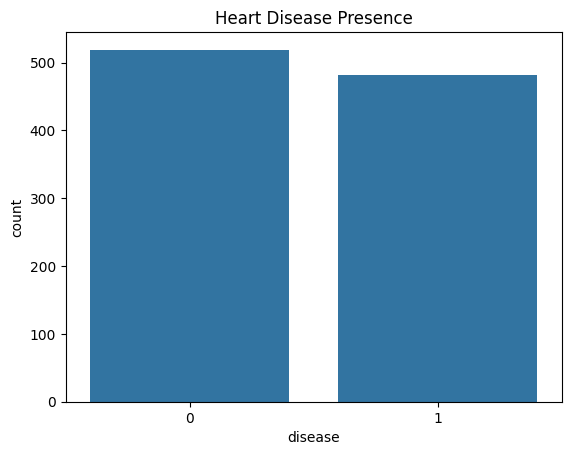

Accuracy: 0.505
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.69      0.58        99
           1       0.52      0.33      0.40       101

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.51      0.51      0.49       200



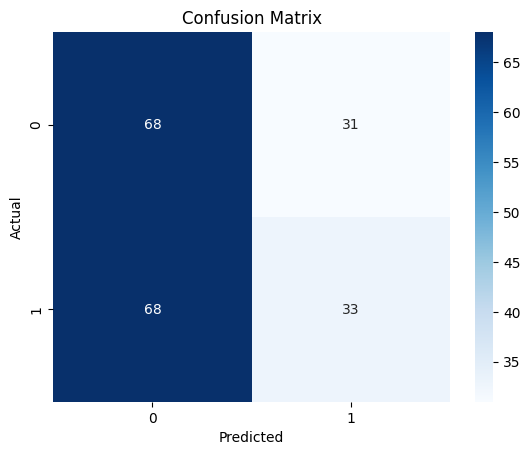

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datetime import timedelta, datetime
import random

# Simulate synthetic data based on Data Information.pdf
np.random.seed(42)
n = 1000  # number of samples

df = pd.DataFrame({
    'date': pd.date_range(start='2020-01-01', periods=n, freq='D'),
    'country': np.random.choice(['India', 'USA', 'UK', 'Germany'], n),
    'id': range(1, n + 1),
    'active': np.random.randint(0, 2, n),
    'age': np.random.randint(30*365, 70*365, n),  # age in days (30 to 70 years)
    'alco': np.random.randint(0, 2, n),
    'ap_hi': np.random.randint(90, 180, n),
    'ap_lo': np.random.randint(60, 120, n),
    'cholesterol': np.random.randint(1, 4, n),
    'gender': np.random.choice(['M', 'F'], n),
    'gluc': np.random.randint(1, 4, n),
    'height': np.random.randint(150, 200, n),
    'occupation': np.random.choice(['engineer', 'teacher', 'doctor', 'student'], n),
    'smoke': np.random.randint(0, 2, n),
    'weight': np.round(np.random.uniform(45.0, 100.0, n), 2),
    'disease': np.random.randint(0, 2, n)
})

# Save to CSV
df.to_csv('heart.csv', index=False)

# Load dataset
df = pd.read_csv('heart.csv')
df.head()

# Drop non-useful columns for modeling
df = df.drop(['id', 'date', 'country', 'occupation'], axis=1)

# Encode gender
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

# Convert age from days to years
df['age'] = (df['age'] / 365).astype(int)

# Check for missing values
print(df.isnull().sum())

# Visualize target distribution
sns.countplot(x='disease', data=df)
plt.title("Heart Disease Presence")
plt.show()


X = df.drop('disease', axis=1)
y = df['disease']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
